In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy
from matplotlib.offsetbox import AnchoredText
import cartopy.feature as cfeature
import scipy.fft as sf
from scipy import signal
import xarray.ufuncs as xu
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [14]:
data_dir = '/home/gbromley/code/ObsWetDrySeason/CPC_UNI_Data/'


ds_onset = xr.open_mfdataset(data_dir+'onset.wet.season.CPC_UNI.*',decode_times = False, combine='nested',concat_dim='time')

In [15]:
ds_demise = xr.open_mfdataset(data_dir+'demise.wet.season.CPC_UNI.*',decode_times = False, combine='nested',concat_dim='time')

In [16]:
temp_onset = ds_onset['DOY'].isel(lev=0)
bombardi_onset = temp_onset.sel(lat=48.0, lon=255.0)

In [17]:
temp_demise = ds_demise['DOY'].isel(lev=0)
bombardi_demise = temp_demise.sel(lat=48.0, lon=255.0)

In [18]:
onset_interval = np.empty(4)
demise_interval = np.empty(4)

def OD_ci(data):
    
    m = np.nanmean(data.values)
    s = np.nanstd(data.values)
    c = len(data.values)
    upper = (m + 1.96*s/np.sqrt(c))
    lower = (m - 1.96*s/np.sqrt(c))
    return np.array([m,s,upper,lower])

onset_interval = OD_ci(bombardi_onset)
demise_interval = OD_ci(bombardi_demise)

In [19]:
onset_interval

array([116.39024353,  20.88280487, 122.70592556, 110.0745615 ])

In [20]:
demise_interval

array([244.5       ,  32.95325089, 254.46620213, 234.53379787])

/Users/gbromley/opt/anaconda3/envs/Research2021/lib/python3.8/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


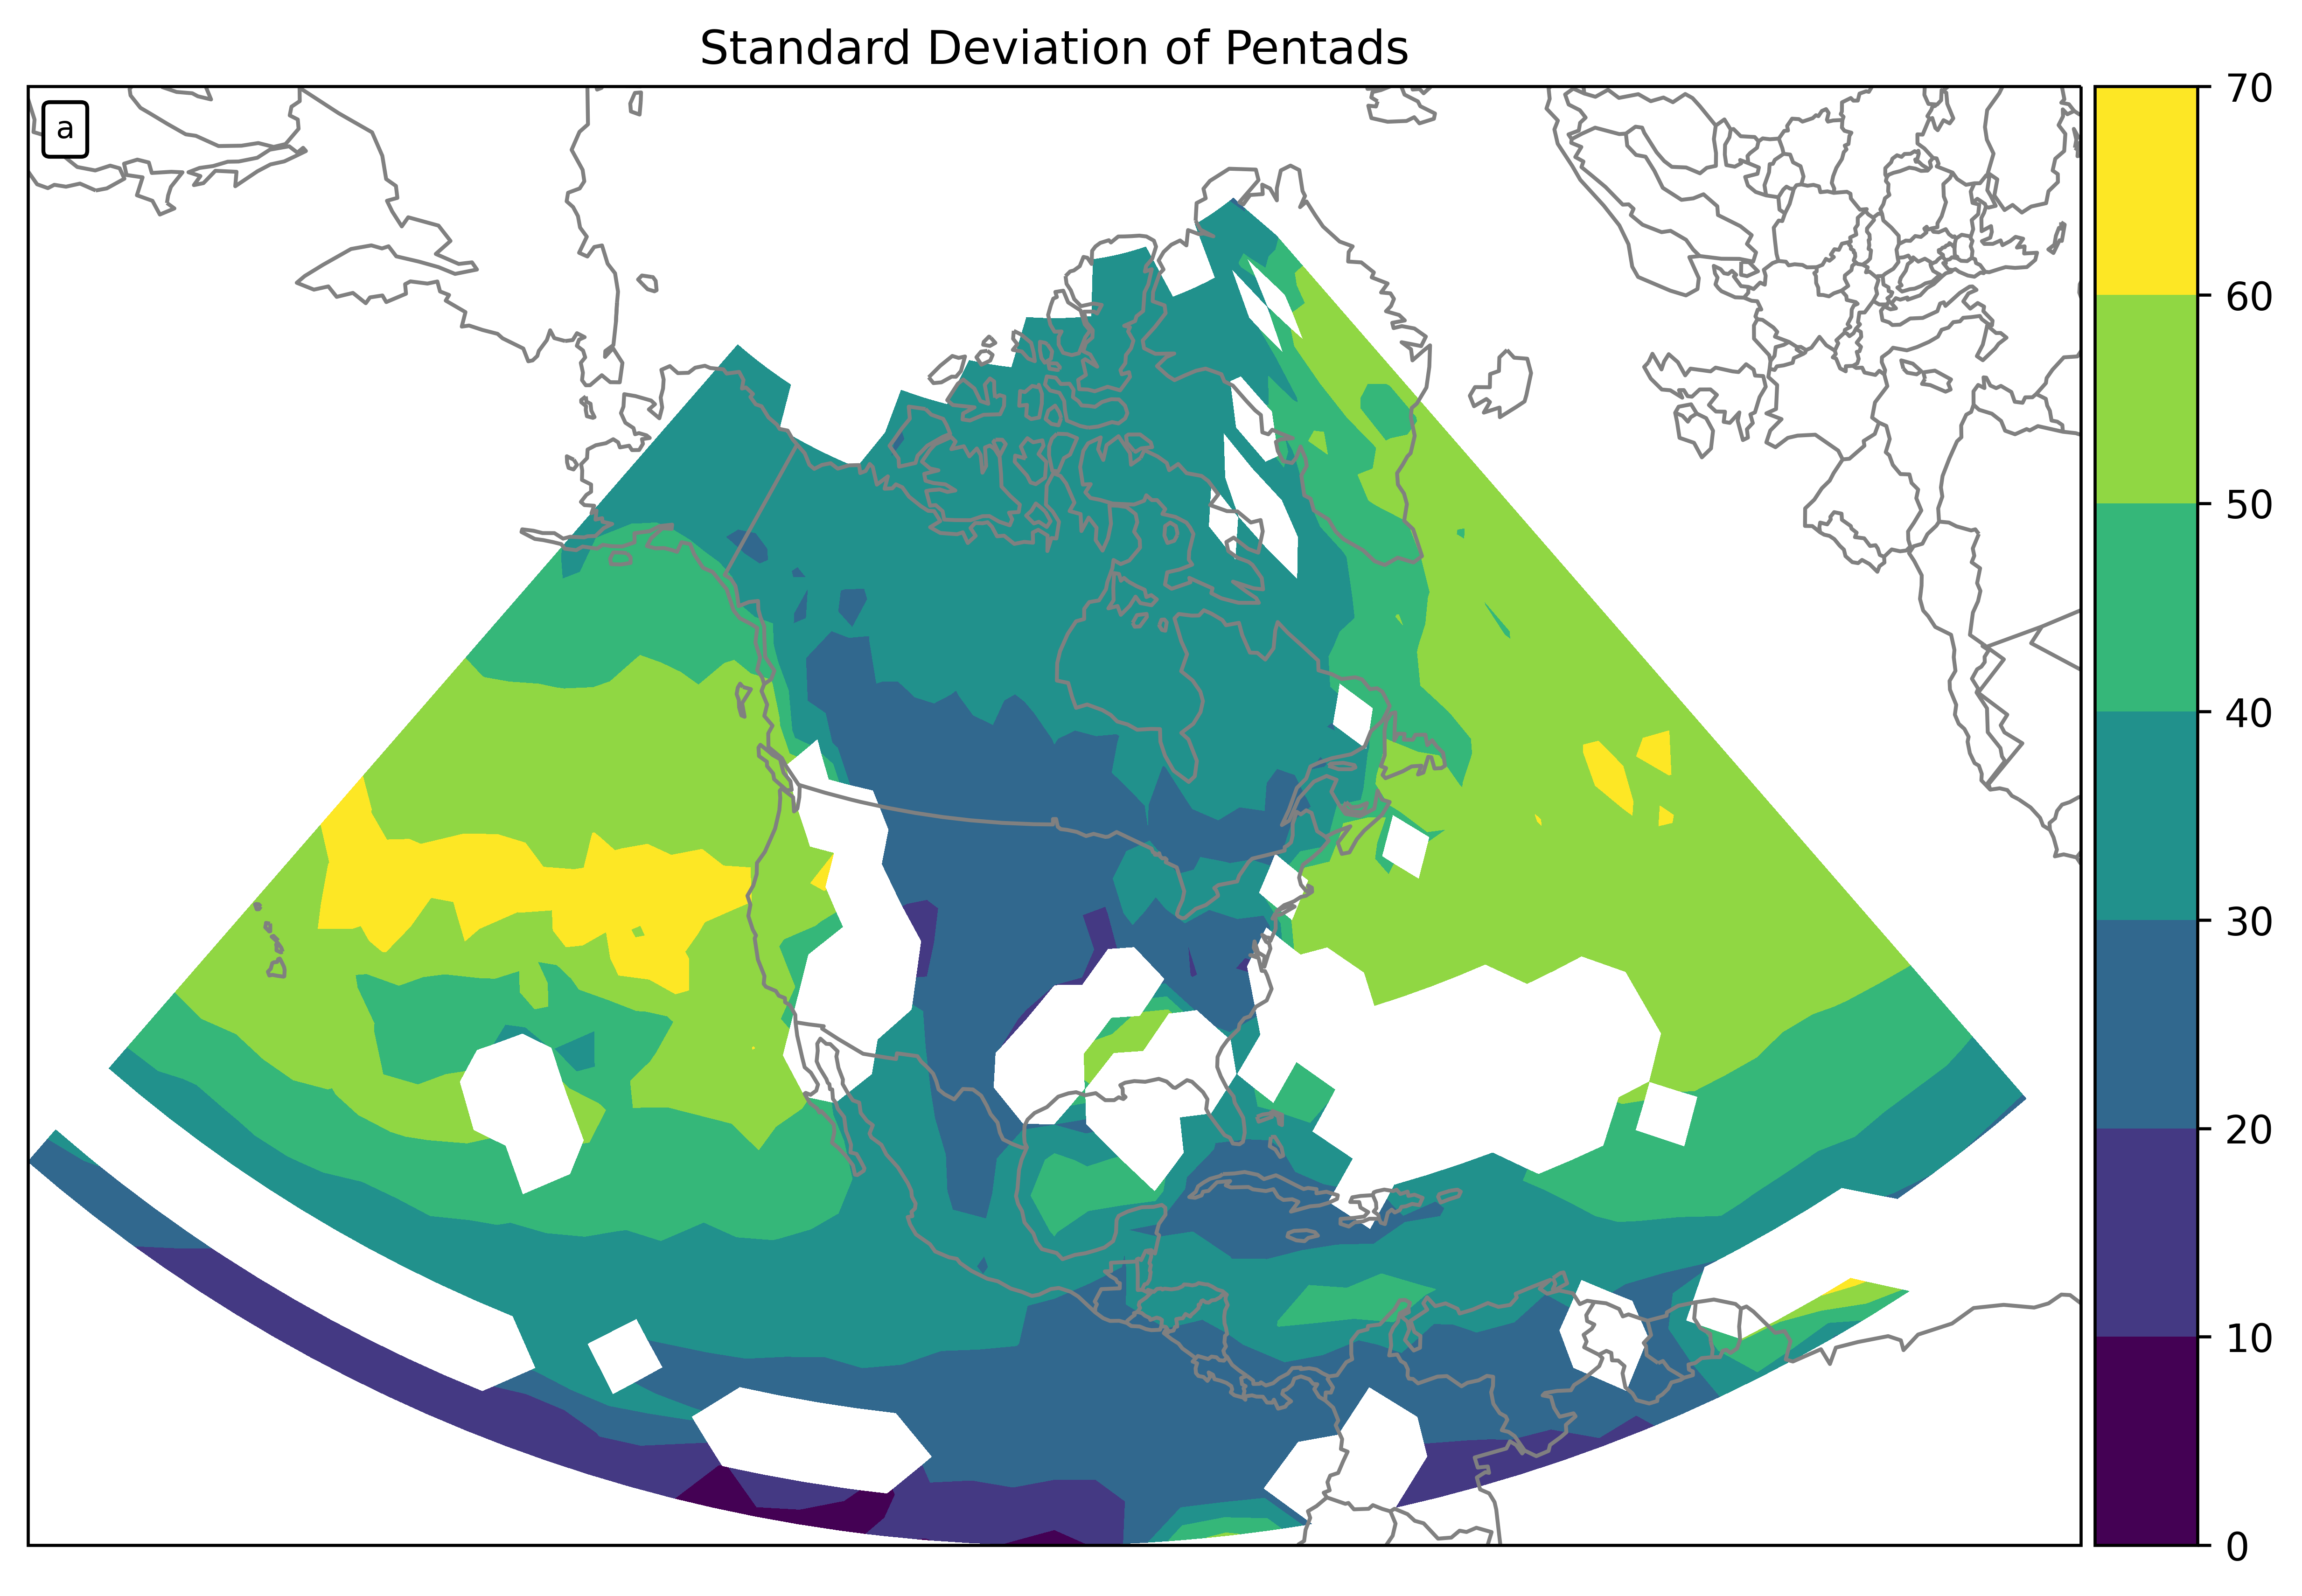

In [31]:
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
#cmap = mpl.cm.RdBu_r


f, ax1 = plt.subplots(1, 1, figsize=(10, 13), dpi=600, subplot_kw={'projection': map_proj})
p = pentad_mean.plot.contourf(ax=ax1,transform=ccrs.PlateCarree(), add_colorbar=False)


### Setting 1st plot parameters ###
ax1.coastlines(color='grey')
ax1.add_feature(cartopy.feature.BORDERS, color='grey')
#ax1.add_feature(cfeature.STATES, color='grey')
#ax1.set_xticks(np.arange(-180,181, 40))
#ax1.set_yticks(np.arange(-90,91,15))
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Standard Deviation of Pentads')
at = AnchoredText("a",
                      loc='upper left', prop=dict(size=8), frameon=True,)
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05, axes_class=plt.Axes)
plt.colorbar(p, cax=cax)